<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Week3/Logistic_Regression/Logistic_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing Logistic Regression
Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variable/s. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical. Logistic Regression is a supervised machine learning algorithm/model.

## Agenda
*  About Dataset
*  Loading Libraries
*  Loading Data
*  Understanding Data
*  Separating Input/Independent and Output/Dependent Variables
*  Splitting the data
*  Building Model
*  Prediction
*  Model Performance

## About Dataset
The dataset has two columns - age (age of the person/customer) and bought_insurance (whether the customer bought insurance or not). If bought_insurance = 1, the customer bought insurance and if bought_insurance = 0, the customer did not buy the insurance.

Dataset Link: [insurance_data](https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv)

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processin and data frames. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

**We can import all the libraries that we think might be needed or can import as we go along.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data
Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

In [ ]:
# In read_csv() function, we have passed the raw data link at github
data_location = "https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv"
data = pd.read_csv(data_location)

## Understanding Data
Let's check how our data looks. This can be done using head() method.

In [ ]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


There are two columns:

*  age: The age of the customer
*  bought_insurance: If the customer bought insurance (1) or not (0). This is our target variable which we are interested to know.

Since our target variable has only two different classes/values, we can say it as a binary classification problem. And Logistic Regression is used for binary classification problems.

Looking the relationship between age and bought_insurance using scatter plot.

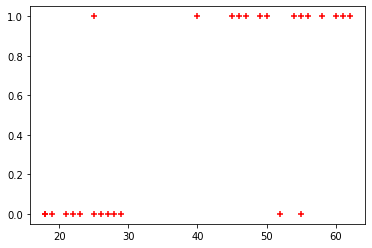

In [ ]:
plt.scatter(data.age,data.bought_insurance,marker='+',color='red')

We can easily observe from the scatter plot that generally the customer who is of age less than 30 years has not bought the insurance.

## Separating Input and Output Variables
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will buy insurance or not is dependent on the age of that person

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [ ]:
X = data[['age']]     # input variable

y = data['bought_insurance']    # output variable

If you notice the above code cell, I have used two square brackets while taking input variables and only one square bracket while taking output variable. Why?

All machine learning algorithm accepts input variables as a 2D array and output variable as 1D array. Using two square brackets while selecting the input variables gives you the shape of input variable/s as 2D, but if you use only one square bracket, the shape will be 1D as you can see in the case of y.

Let's check the shapes of X and y.

In [ ]:
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (27, 1) Dimension:  2
Shape:  (27,) Dimension:  1


## Splitting the data into Train and Test Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set  which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Building Model


Now we are finally ready, and we can train the model.

First, we need to import our model - Logistic Regression (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [ ]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The training happens in the third line (the "fit" function).

## Prediction
Now logistic regression model (i.e. log_model) is trained using X_train and y_trian data. Let's predict the target value (i.e. bought_insurance) for the X_test data. We use "predict()" method for prediction.

In [ ]:
predictions = log_model.predict(X_test)

We already have actual target values (i.e. y_test) for X_test. Let's compare y_test and the predicted value for X_test by our log_model.

In [ ]:
y_test.values

array([1, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0])

There is one person who had actually bought insurance but our model predicted that the person had not bought insurance. So, there is one misclassified data by our model.

## Model Performance
We can also check how accurate our model is performing using the 'accuracy_score' class from 'sklearn.metrics'.

In [ ]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions) 

array([[5, 0],
       [1, 3]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()   # ravel() will convert the 2D numpy array into 1D.
print(tn, fp, fn, tp)

5 0 1 3


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.8888888888888888

**Why accuracy score?**

Accuracy is a great measure when you have symmetric datasets where values of false positive and false negatives are almost same. As you can see the confusion matrix above, false positives (fp = 0) and false negatives (fn = 1) are almost same. So here accuracy score is the best measure.

Further reading: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

Our model is predicting 88.9% correct results.

### Thanks for reading the Notebook!!!

## Exercise
**Instruction:**

Use the raw data github link: https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv 

Or you can download it here from [here](https://www.kaggle.com/giripujar/hr-analytics)

**Exercise:**

*  Load libraries and data.
*  Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
*  Plot bar charts showing impact of employee salaries on retention
*  See the correlation between department and employee retention
*  Separate dependent and independent variables.
*  Split the data into train set and test set
*  Now build Logistic Regression model and do prediction for test data
*  Measure the accuracy of the model


**References:**

https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/7_logistic_regression.ipynb